In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [9]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

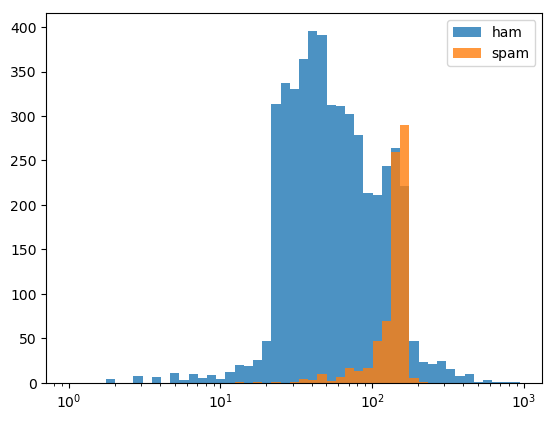

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

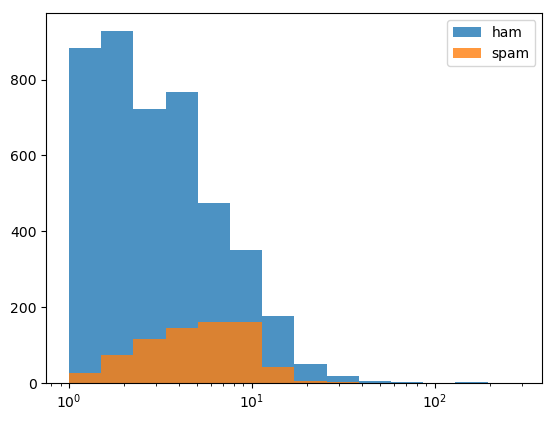

In [15]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['length', 'punct']]

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(3900, 2)

In [19]:
X_test.shape

(1672, 2)

In [20]:
y_train.shape

(3900,)

In [21]:
y_test.shape

(1672,)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_model = LogisticRegression(solver='lbfgs')

In [24]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
from sklearn import metrics

In [26]:
predictions = lr_model.predict(X_test)

In [27]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [29]:
# y_test

In [30]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [31]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [32]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [33]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [34]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [35]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [36]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

C:\Users\jonat\anaconda3\envs\nlp_course\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1373   75]
 [ 121  103]]


<h1>Text Feature Extraction</h1>

<p>Start with a new approach to the dataset:</p>

In [39]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [40]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [41]:
X = df['message']

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
count_vect = CountVectorizer()

In [46]:
# count_vect.fit(X_train)
# X_train_counts = count_vect.transform(X_train)

# The above lines can be simplified in the following line:
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [47]:
X_train.shape

(3733,)

In [48]:
X_train_counts.shape

(3733, 7082)

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
tfidf_transformer = TfidfTransformer()

In [51]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [52]:
X_train_tfidf.shape

(3733, 7082)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
vectorizer = TfidfVectorizer()

In [55]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [56]:
from sklearn.svm import LinearSVC

In [57]:
clf = LinearSVC()

In [58]:
clf.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [61]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [62]:
predictions = text_clf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
print(confusion_matrix(y_test, predictions))

[[1586    7]
 [  12  234]]


In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

   micro avg       0.99      0.99      0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [66]:
from sklearn import metrics

In [67]:
metrics.accuracy_score(y_test, predictions)

0.989668297988037

In [72]:
text_clf.predict(["Hi how are you?"])

array(['ham'], dtype=object)